# Mudcard
- **Why do features go to 0 with L1 norm but not with L2 norm?**
    - The features don't go to 0, the feature weights do.
    - When you use L2 regularization, the weights approach 0 as alpha becomes larger but the weights only reach 0 if alpha is +inf
    - In L1 regularization, the weights do reach exact 0s as alpha becomes larger
    - The explanation is a bit complex and beyond the scope of this class but it has to do with the derivatives of the L1 and L2 norms with respect to the weights.
    - The derivative of the L1 norm (the absolute value function) is a negative constant when w is negative, positive constant when w is positive, and undefined when w is 0.
    - The derivative of the L2 norm is much better behaved, it's a linear function.
    - If you implement gradient descent with L1 or L2 regularization, this behavior comes out from the equations and it's the result of the derivatives of the norms.

## The supervised ML pipeline
The goal: Use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new).

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
<span style="background-color: #FFFF00">**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models</span>
   - start with simple models like linear or logistic regression 
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Supervised ML algorithms
By the end of this **week**, you will be able to
- Summarize how decision trees, random forests, and support vector machines work
- Describe how the predictions of these techniques behave in classification and regression
- Describe which hyper-parameters should be tuned

## Which ML algorithm to try on your dataset?

- there is no algo that performs well under all conditions! - no free lunch theorem
- you need to try as many as you can to find the one that performs best
- other than predictive power, what else is important for you?
   - how the model behaves with respect to outliers?
   - does the prediction varies smoothly with the feature values?
   - can the model capture non-linear dependencies?
   - is the model easy to interpret for a human?

### Goal for this week: fill out the table:

| ML algo | suitable for large datasets? | behaviour wrt outliers | non-linear? | params to tune | smooth predictions | easy to interpret? |
| - | :-: | :-: | :-: | :-: | :-: | :-: |
| linear regression            	|              yes             	|<font color='red'>tbd</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|<font color='red'>tbd</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|


## Linear regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = LinearRegression()
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


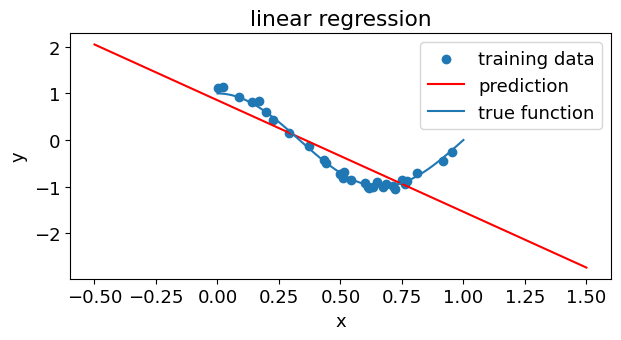

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 13})


plt.figure(figsize=(6.4,3.6))
plt.scatter(X,y,label='training data')
plt.plot(X_new,y_new,'r',label='prediction')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression')
plt.legend()
plt.tight_layout()
plt.savefig('figures/lin_reg.png',dpi=300)
plt.show()

## Logistic regression

In [3]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.linear_model import LogisticRegression
# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = LogisticRegression()
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

LogisticRegression()

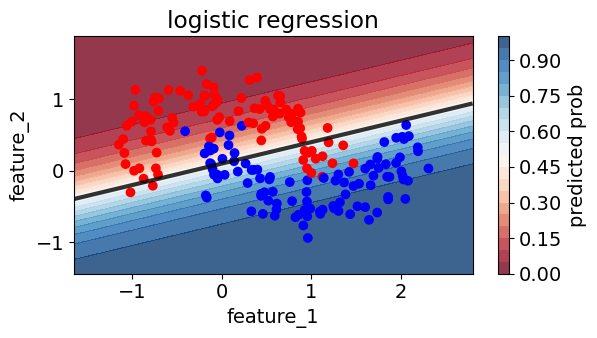

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 14})

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6.4,3.6))
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('logistic regression')
plt.tight_layout()
plt.savefig('figures/logistic_reg.png',dpi=300)
plt.show()

| ML algo | suitable for large datasets? | behaviour wrt outliers | non-linear? | params to tune | smooth predictions | easy to interpret? |
| - | :-: | :-: | :-: | :-: | :-: | :-: |
| linear regression            	|              yes             	|<font color='red'>linear extrapolation</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|<font color='red'>scales with distance from the decision boundary </font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|



### Quiz 1

Calculate the predicted probabilities on X for the logistic regression model and determine what critical probability gives the best f1 score. Round to the second significant digit!


In [ ]:
# add your code below


## <center>Decision trees and random forests</center>

- Decision tree: the data is split according to certain features
- Here is an example tree fitted to data:

<center><img src = 'figures/Decision-Trees-modified-1.png' width="500"></center>

- Trees have nodes and leaves.
- The critical values and features in the nodes are determined automatically by minimizing a cost function.

- Random forest: ensemble of random decision trees
- Each tree sees a random subset of the training data, that's why the forest is random.

<center><img src="figures/tree.png" width="450"></center>



### Quiz 2
- **Use the dataset below and create a decision tree with max_depth = 2 to predict the target variable!**
- **What is your tree's prediction for each person?**
- Remember, you might not be able to find a tree that predicts everyone perfectly.
- It just needs to get as many people as possible right.

In [23]:
# how many features should your team use?
nr_ftrs = np.random.randint(1,4)
# which features should your team use?
ftrs_to_use = np.random.randint(0,6,size=nr_ftrs)
print('use columns with indices', sorted(ftrs_to_use), 'to create your decision tree.')

use columns with indices [3, 5] to create your decision tree.


| X|age|gender (M=0, F=1)|is student?|is parent?|uses computer for work?|nr. of hours on c.|<font color='red'>Like computer games?</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__person 0__| 5|0|1|0|0|0.0|__<font color='red'>1</font>__|
|__person 1__|48|1|0|1|0|1.8|__<font color='red'>1</font>__|
|__person 2__|62|0|0|1|0|0.2|__<font color='red'>0</font>__|
|__person 3__|10|1|1|0|0|2.4|__<font color='red'>1</font>__|
|__person 4__|23|1|1|0|1|4.2|__<font color='red'>0</font>__|
|__person 5__|36|0|0|0|1|3.1|__<font color='red'>1</font>__|
|__person 6__|12|0|1|0|0|3.1|__<font color='red'>1</font>__|
|__person 7__|85|0|0|0|1|1.0|__<font color='red'>0</font>__|
|__person 8__|33|1|1|1|0|1.5|__<font color='red'>0</font>__|
|__person 9__|56|0|0|0|1|0.1|__<font color='red'>1</font>__|

## Mud card